### Assignment 2, Block 2

Julian Barth, Marin Desgeans, Lucas Eichenberger

$1^{st}$ october 2025

##### Question 1

The three different types of calculation for absorption studies that AiiDAlab offers are the following:
- Isotherm 
- Pore analysis
- Geometry Optimization 

##### Question 2

The following results were computed for the IRMOF-1 using a probe radius of 1.525 Å:
- Density = 0.576983  $g/cm^3$
- accessible surface area - ASA = 3964.65 $Å^2$
- accessible probeoccupiable volume - POAV = 13737.4 $Å^3$
- porosity= 0.77498

##### Question 3

The henry coefficient average for CO<sub>2</sub> at 300 K is 4.95305*10<sup>-6</sup>. It was found by running isotherm simulation on AiiDAlab. 


##### Question 4

The $CO_2$ and $CH_4$ pure isotherms were computed at 300K using AiiDAlab. The results are shown below.

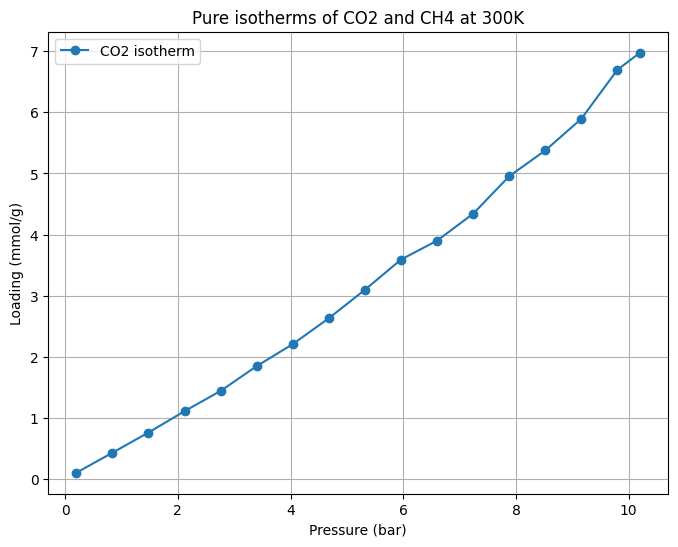

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast 

# The data are loaded from CSV files
df1 = pd.read_csv("q3to4_CO2.csv")
isotherm_str = df1.loc[df1["Key"] == "isotherm", "Value"].values[0]
isotherm_dict = ast.literal_eval(isotherm_str)
df_co2 = pd.DataFrame({
    "pressure": isotherm_dict["pressure"],
    "loading_absolute_average": isotherm_dict["loading_absolute_average"]
})
df2 = pd.read_csv("q3to4_CH4.csv")
isotherm_str = df2.loc[df2["Key"] == "isotherm", "Value"].values[0]
isotherm_dict = ast.literal_eval(isotherm_str)
df_ch4 = pd.DataFrame({
    "pressure": isotherm_dict["pressure"],
    "loading_absolute_average": isotherm_dict["loading_absolute_average"]
})

# Plotting the pure isotherms
plt.figure(figsize=(8,6))
plt.plot(df_co2["pressure"], df_co2["loading_absolute_average"], 'o-', label='CO2 isotherm')
plt.plot(df_ch4["pressure"], df_ch4["loading_absolute_average"], 'o-', label='CH4 isotherm')
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Pure isotherms of CO2 and CH4 at 300K")
plt.legend()
plt.grid(True)
plt.show()

##### Question 5

The package "pyIAST" was used to obtain the binary-mixture isotherms by the linear interpolation method for a pressure range from 0.1 to 4.0 bar with increments of 0.2 bar. The needed code and the corresponding graph are shown below.

    pressure  loading_absolute_average
0       0.20                  0.101561
1       0.84                  0.428550
2       1.48                  0.759565
3       2.12                  1.109152
4       2.76                  1.440589
5       3.40                  1.846606
6       4.04                  2.206453
7       4.68                  2.630230
8       5.32                  3.095567
9       5.96                  3.590320
10      6.60                  3.899873
11      7.24                  4.340404
12      7.88                  4.953991
13      8.52                  5.376600
14      9.16                  5.894405
15      9.80                  6.697316
16     10.20                  6.975764


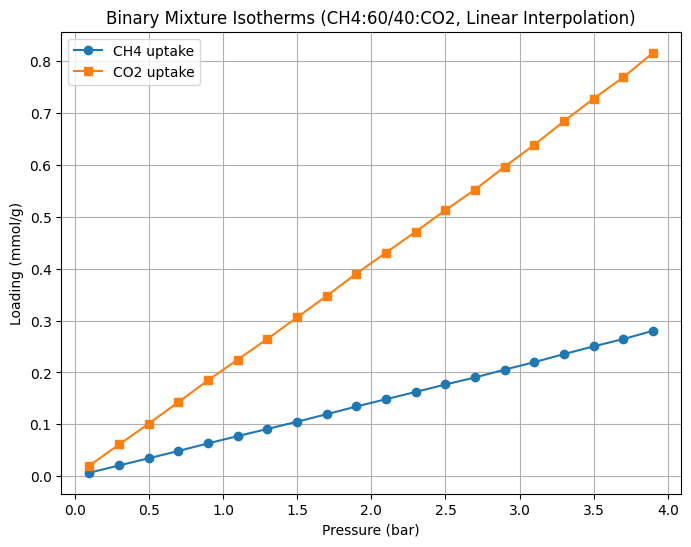

In [ ]:
import pyiast


# Create Isotherm objects using interpolation
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="loading_absolute_average",
                                    pressure_key="pressure",
                                     fill_value=df_ch4["loading_absolute_average"].max())

co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading_absolute_average",
                                    pressure_key="pressure",
                                    fill_value=df_co2["loading_absolute_average"].max())

#We define the mixture as containing 60% of methane and 40% of carbon dioxide
mole_fraction = np.array([0.6, 0.4])

# Pressure range 0.1 to 4.0 with 0.2 increments
P_range = np.arange(0.1, 4.0, 0.2)

# we perform an IAST calculation for each pressure point
loadings_gas1 = []
loadings_gas2 = []

for P in P_range:
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    loadings_gas1.append(result[0])
    loadings_gas2.append(result[1])

# We plot the results using matplotlib
plt.figure(figsize=(8,6))
plt.plot(P_range, loadings_gas1, 'o-', label='CH4 uptake')
plt.plot(P_range, loadings_gas2, 's-', label='CO2 uptake')
plt.xlabel("Pressure (bar)")
plt.ylabel("Loading (mmol/g)")
plt.title("Binary Mixture Isotherms (CH4:60/40:CO2, Linear Interpolation)")
plt.legend()
plt.grid(True)
plt.show()


##### Question 6

The selectivity of $CO_2$ over $CH_4$ was calculated at 0.1, 1, 2 and 3 bars and 300 K using the following equation:

$$S_{CO_2/CH_4}=\frac{q_{CO_2}}{q_{CH_4}}\frac{y_{CH_4}}{y_{CO_2}} $$

Where $y_{CH_4}$ and $y_{CO_2}$ are fixed values here equal to, respectively, 0.6 and 0.4. On the other hand, $q_{CH_4}$ and $q_{CO_2}$ are the binary loading at the adsorption conditions in mmol/g obtained from the IAST calculations shown below.

In [36]:
P_range = np.array([0.1, 1.0, 2.0, 3.0])

for P in P_range:
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )

    # Selectivity calculation
    S_co2_ch4 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])
    print(f"Selectivity of CO2 over CH4 at P={P} bar is equal to {S_co2_ch4:.4f}\n")


Selectivity of CO2 over CH4 at P=0.1 bar: S_CO2/CH4 = 4.8695

Selectivity of CO2 over CH4 at P=1.0 bar: S_CO2/CH4 = 4.6796

Selectivity of CO2 over CH4 at P=2.0 bar: S_CO2/CH4 = 4.6838

Selectivity of CO2 over CH4 at P=3.0 bar: S_CO2/CH4 = 4.7100



##### Question 7

To prove that if the molar fraction of $CO_2$ drops to 0.2, the selectivity doesn't change we will perform the calculations again with the modified ratio. 

In [44]:
for P in P_range:
    #the selectivity is calculated at different molar fractions
    mole_fraction=np.array([0.6, 0.4])
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    S_co2_40_ch4_60 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])

    mole_fraction=np.array([0.8, 0.2])
    result = pyiast.iast(
        partial_pressures=P * mole_fraction,
        isotherms=[ch4_isotherm, co2_isotherm],
        verboseflag=False,
    )
    S_co2_20_ch4_80 = (result[1] / result[0]) * (mole_fraction[0] / mole_fraction[1])

    #the results are printed
    print(f"Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to {S_co2_40_ch4_60:.4f}\nSelectivity of CO2 over CH4 when 20% of CO2 is present is equal to {S_co2_20_ch4_80:.4f}\n")

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7982
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.8695

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.6550
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.6796

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7037
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.6838

Selectivity of CO2 over CH4 when 40% of CO2 is present is equal to 4.7791
Selectivity of CO2 over CH4 when 20% of CO2 is present is equal to 4.7100



Very small difference is observed exhibiting the almost constant selectivity of $CO_2$ over $CH_4$ between the two ratios.

In order to test if selectivity is a function of time is measure two new isotherms with an arbitrary ratio of $CH_4$ and $CO_2$ at a different themperature, obtain the binary-mixture isotherms by linear interpolation and then recalculate the selectivity at the same pressures to comparate the results.

##### Question 8

IRMOF-1 is not a good candidate for $CH_4$ storage when $CO_2$ is present. The selectivity values (~4.7 across pressures) show that the material consistently prefers $CO_2$ over $CH_4$. 
$$ S_{CO_2/CH_4}\cdot\frac{y_{CO_2}}{y_{CH_4}}\cong 4.7\cdot\frac{0.4}{0.6}=3.13=\frac{q_{CO_2}}{q_{CH_4}}$$
Since selectivity reflects the relative affinity of the adsorbent, this means that even if the feed is enriched in $CH_4$, IRMOF-1 will still adsorb proportionally more $CO_2$. Because the selectivity remains high and nearly constant with pressure, this unfavorable behavior persists under typical operating conditions. Therefore, IRMOF-1 is a poor choice for $CH_4$ storage for $CO_2$/$CH_4$ mixtures.